In [536]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")

clinical_trial_data = pd.read_csv("clinicaltrial_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data,on="Mouse ID")
combined_df = pd.DataFrame(combined_data)
# Display the data table for preview

combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [537]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

average_tumor_volume = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Tumor Volume (mm3)': "mean"})
# Preview DataFrame
average_tumor_volume.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [538]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

standard_error_data = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Tumor Volume (mm3)': "sem"})

# Preview DataFrame
standard_error_data.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [539]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df = average_tumor_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
reformat_df_se = standard_error_data.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
reformat_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [540]:
df1 = reformat_df[['Capomulin','Infubinol','Ketapril','Placebo']]
df1


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


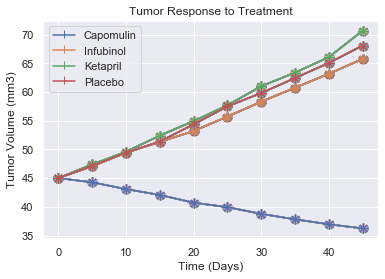

In [541]:
#Generate graph
x1 = list(df1.index)

markers = [(i, j,0) for i in range(1, 11) for j in range(1, 3)]
[plt.plot(x1,df1.values, marker=markers[i], ms=10) for i in range(16)]
plt.xlabel('Time (Days)') 
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'], loc='upper left')
# Save the Figure 
plt.savefig('Tumor_Response_to_Treatment.png')



## Metastatic Response to Treatment

In [542]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
average_tumor_volume_site = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Metastatic Sites': "mean"})
# Preview DataFrame
average_tumor_volume_site.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [543]:
reformat_df_site = average_tumor_volume_site.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
reformat_df_site

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [544]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_data_site = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Metastatic Sites': "sem"})
standard_error_data_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [545]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df_site_se = standard_error_data_site.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
df2 = reformat_df_site_se[['Capomulin','Infubinol','Ketapril','Placebo']]
df2
reformat_df_site

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [546]:
dfObj = pd.DataFrame(reformat_df_site, columns = ['Capomulin','Infubinol','Ketapril','Placebo'])
dfObj

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


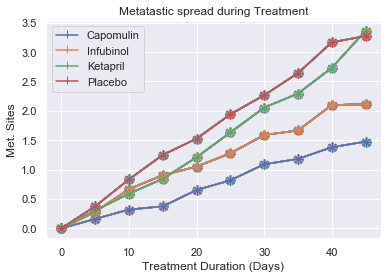

In [547]:
reformat_df

x3 = list(dfObj.index)
#Create the graph
[plt.plot(x3,dfObj.values, marker=markers[i], ms=10) for i in range(16)]
plt.xlabel('Treatment Duration (Days)') 
plt.ylabel('Met. Sites') 
plt.title('Metatastic spread during Treatment')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'], loc='upper left')
#Save the figure
plt.savefig('Metatastic_spread_during_Treatment.png')

## Survival Rates

In [548]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_of_mice = combined_df.groupby(['Drug', 'Timepoint'],as_index=False).agg({'Mouse ID': "count"})
# Preview DataFrame
count_of_mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [549]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df_mice_count = count_of_mice.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
reformat_df_mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [550]:
#Calculate the percentages for the graph
Perc_calc_for_graph = 100*(reformat_df_mice_count[cols]/reformat_df_mice_count[cols].iloc[0])
df3 = Perc_calc_for_graph[['Capomulin','Infubinol','Ketapril','Placebo']]
df3

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


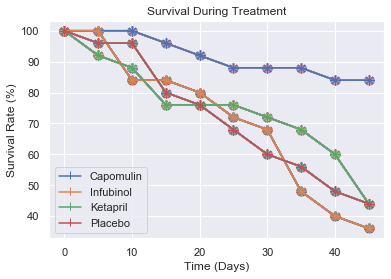

In [558]:
# Generate the Plot (Accounting for percentages)
x3 = list(df3.index)

markers = [(i, j,0) for i in range(1, 11) for j in range(1, 3)]
[plt.plot(x3,df3.values, marker=markers[i], ms=10) for i in range(16)]
plt.ylabel('Survival Rate (%)') 
plt.xlabel('Time (Days)') 
plt.title('Survival During Treatment')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'], loc='lower left')

# Save the Figure
plt.savefig('Survival_During_Treatment.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [552]:
# Calculate the percent changes for each drug - using the data from the average tumor growth
cols = reformat_df.columns
survival_rate = (100*(reformat_df[cols].iloc[-1]/reformat_df[cols].iloc[0]-1)).rename('Percentage Change')
survival_rate_df = pd.DataFrame(survival_rate)
# Display the data to confirm
survival_rate_df


,Percentage Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [553]:
#Just some extra - check change from period to period
perc_changes = reformat_df_mice_count.pct_change()
print(perc_changes)

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0                NaN       NaN        NaN       NaN       NaN       NaN   
5           0.000000 -0.160000   0.000000 -0.080000 -0.080000 -0.040000   
10          0.000000 -0.047619  -0.160000 -0.043478 -0.086957  0.000000   
15         -0.040000 -0.050000   0.000000 -0.136364  0.000000 -0.166667   
20         -0.041667 -0.052632  -0.047619  0.000000 -0.047619 -0.050000   
25         -0.043478  0.000000  -0.100000  0.000000 -0.100000 -0.105263   
30          0.000000 -0.111111  -0.055556 -0.052632 -0.166667 -0.117647   
35          0.000000 -0.125000  -0.294118 -0.055556  0.000000 -0.066667   
40         -0.045455  0.000000  -0.166667 -0.117647  0.000000 -0.142857   
45          0.000000 -0.071429  -0.100000 -0.266667 -0.133333 -0.083333   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                     

In [554]:
df4 = survival_rate[['Capomulin','Infubinol','Ketapril','Placebo']]
df4

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Name: Percentage Change, dtype: float64

In [555]:
survival_rate_df.index.values

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

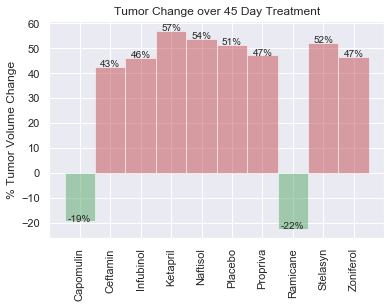

In [556]:
# Store all Relevant Percent Changes into a Tuple
y_pos = survival_rate

#change the colors of the bars and the add the lables
colors = []
bar_tick_label = []
for value in y_pos:
    label = "{:.2f}".format(value)
    bar_tick_label.append(label)
    if value<0:
        colors.append('g')
    else:
        colors.append('r')


# Plot the graph        
plt.bar(cols,y_pos, color=colors, width=1, align='center', alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Orient widths. Add labels, tick marks, etc. 
for x,y in zip(cols,y_pos):

    label = "{:.0f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Save the Figure
plt.savefig('Tumor_Growth_over_45_day_treatment.png')

# Show the Figure
fig.show()

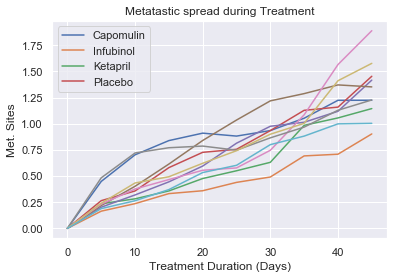

In [557]:
# IGNORE Checking out seaborn functionality
import seaborn as sns; sns.set()
ax = sns.lineplot(x='Timepoint', y='Tumor Volume (mm3)', hue='Drug', err_style="bars", data=standard_error_data).set_title('Metatastic spread during Treatment')
plt.xlabel('Treatment Duration (Days)') 
plt.ylabel('Met. Sites') 
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'], loc='upper left')